# nmi | spring 2024
## lecture 14 : initial value problems


## 6 ordinary differential equations


differential equations model systems that change with time, $y'(t) = f(t,y(t))$.
</br></br>


many equations have no closed form leaving approximation as the only recourse. eg, the approximate solution of ordinary differential equations (ODE) by computational methods.
</br>

### 6.1 initial value problems


a logistic equation models the rate of change of a population: $y' = cy(1-y)$.
</br></br>

eg, population as a proportion of the carrying capacity of an animals habitat. ie, we expect population to grow then level off. with population y, we expect its rate of change y' to be small at the onset and when near capacity.
</br></br>

consider stated $y'$ to have infinitely many $y(t)$. families of equations can be sorted by initial conditions.
</br></br>

\begin{align}
  \textrm{initial value problem (IVP)} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = f(t,y) \\
      y(a) = y_a \\
      t \in [a,b]
    \end{array}
  \right.
\end{align}
</br>

one way to consider differential equations is with a <b>slope field</b> or <b>direction field</b>. an equation is <b>autonomous</b> if the $f(t,y)$ is independent of $t$.
</br>


###### code


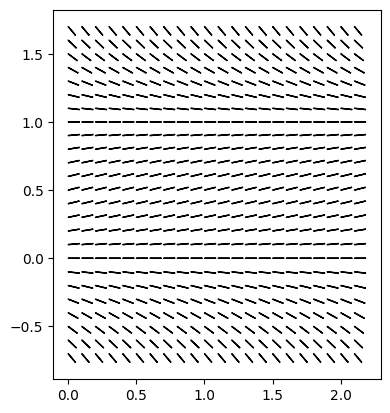

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def main():

  F = lambda t,y: y*(1-y)

  h = 0.1
  ts = np.arange(0,2.1+h,h)
  ys = np.arange(-0.7,1.6+h,h)

  fig,ax = plt.subplots()

  for t in ts:
    for y in ys:
      θ = np.arctan(F(t,y))
      dt = np.cos(θ)*0.8*h
      dy = np.sin(θ)*0.8*h
      plt.arrow(t,y,dt,dy) # lol = arrowheads suddenly vanished?

  ax.set_aspect('equal','box')
  plt.show()

if __name__ == "__main__":
  main()


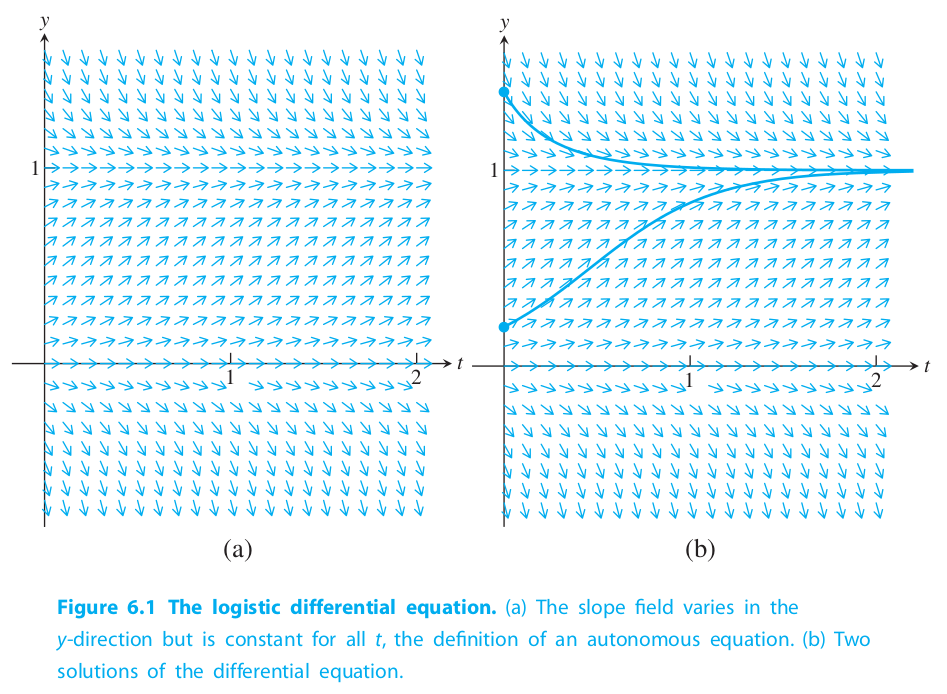

#### 6.1.1 eulers method

the logistic equation is explicit; many are not. the direction field suggests a method to computationally solve an ODE byt following the arrows. ie, start at $(t_0,y_0)$ and go with the flow. ie, use $(t_0,y_0)$ and $y'(t_0,y_0)$ to evaluate $(t_1,y_1)$ and evaluate $y'(t_1,y_1)$ usw.
</br>


##### example 01


draw the slope field of the ivp,
</br></br>

\begin{align}
  \textrm{example one} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 \\
      y(0) = y_0 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>


the slope field given below with the computational solution results given at right. this IVP is nonautonomous - ie, $t$ is a part of $y'$. $y(t) = 3e^{\frac{t^2}{2}} - t^2 -2$ is the exact solution for initial condition $y(0) = 1$.
</br>


###### code


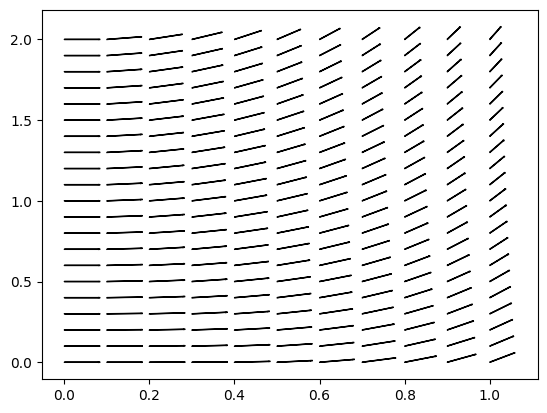

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def main():
  F = lambda t,y: t*y + pow(t,3)

  h = 0.1
  ts = np.arange(0,1.1,h)
  ys = np.arange(0,2.1,h)

  fig,ax = plt.subplots()

  for t in ts:
    for y in ys:
      θ = np.arctan(F(t,y))
      dt = np.cos(θ)*0.8*h
      dy = np.sin(θ)*0.8*h
      plt.arrow(t,y,dt,dy)

  plt.show()

if __name__ == "__main__":
  main()


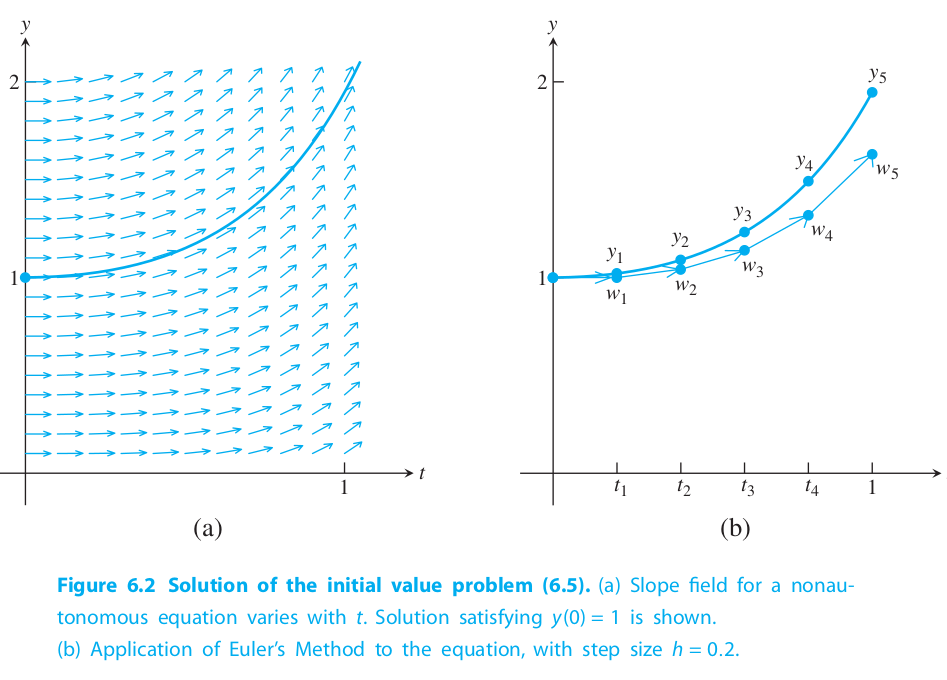

##### usw


<b>eulers method</b>
</br></br>

\begin{align}
  w_o &= y_o \\
  w_{i+1} &= w_i + h\cdot \underbrace{f(t_i,w_i)}_{slope} \quad \textrm{at } t_{i+1}.
\end{align}
</br>


##### example 02


example 02 revisits example 01. eulers method applied to previous example.
</br></br>

\begin{align}
  w_0 &= 1 \\
  w_{i+1} &= w_i +h(t_iw_i + t_i^3)
\end{align}
</br>

error $e_i = |y_i - w_i|$ and step size $h = 0.2$ and $h = 0.1$ below. note: halving the step size nearly halves the error $t = 1.0$.
</br>


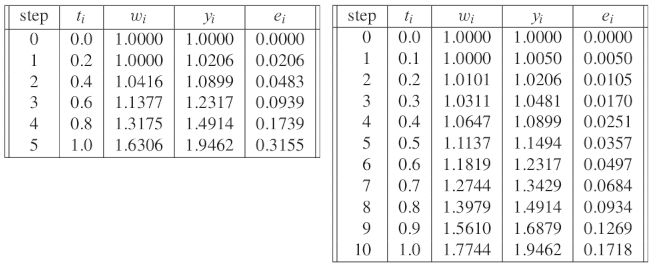

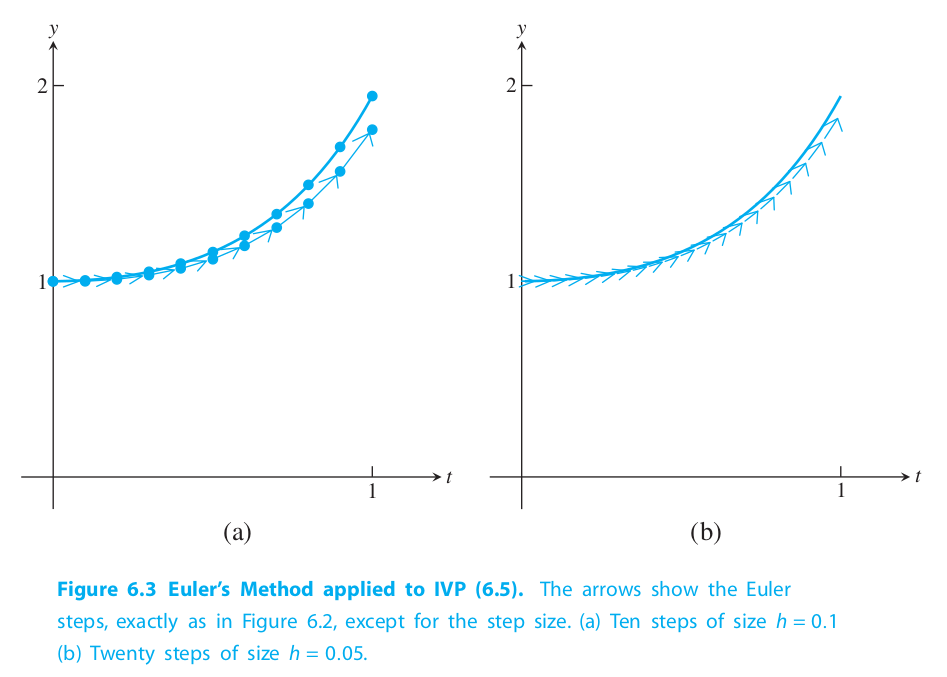

##### example 03


\begin{align}
  \textrm{example 03} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = cy \quad\textrm{where }c\textrm{ is some constant} \\
      y(0) = y_0 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>

\begin{align}
  w_0 &= y_0 \\
  w_{i+1} &= w_i +hcw_i = w_i(1 +hc) \quad\textrm{ for }i = 1,2,3,\dots
\end{align}
</br>


if $y_0 = 0$ then $y = y_0e^{ct}$ .
</br></br>

$$w_i = (1+hc)w_{i-1} = (1+hc)^2w_{i-2} = \dots = (1+hc)^iw_0.$$
</br>

for fixed $t$ and step size $h = \frac{t}{n}$ for integer $n$. at approximate $t$,
</br></br>

$$w_n = (1 + hc)^ny_0 = \left(1+\frac{ct}{n}\right)^ny_0$$
</br>

and
</br></br>

$$\lim_{n\rightarrow\infty} \left(1+\frac{ct}{n}\right)^n = e^{ct}.$$
</br>

ie, for this simple case and as $n\rightarrow\infty$, eulers will converge to the correct solution.
</br>





#### 6.1.2 existence, uniqueness, continuity


ie, 1) does solution exist and 2) is there only one. ideally an IVP has exactly one solution.
</br></br>

$f(t,y)$ is <b>lipschitz continuous</b> in $y$ on the rectangle $S=[a,b] \times [\alpha,\beta]$ if there exists <b>lipschitz constant</b> $L$ such that
</br></br>

$$|f(t,y_1) - f(t,y_2)| \le L|y_1-y_2|$$
</br>

for each $(t,y_1)$,$(t,y_2)$ in $S$. note: a function lipschitz continuous in $y$ is continuous in $y$ but not necessarily differentiable.
</br>


##### example 04


example 04 revisits example 01, $f(t,y) = ty + t^3$.
</br></br>

this is lipschitz constant in $y$ on $0\le t\le 1$, $-\infty < y < \infty$. ie,
</br></br>

$$|f(t,y_1) - f(t,y_2)| = |ty_1 - ty_2| \le |t||y_1 - y_2| \le |y_1-y_2|$$
</br>

so the lipschitz constant $L = 1$.
</br>


more generally, $S$ is a [convex](https://en.wikipedia.org/wiki/Convex_function) set. if $f$ is continuously differentiable in $y$ then the maximum absolute value of its partial $\frac{\partial f}{\partial y}$ is a lipschitz constant. by MVT for each fixed $t$ there is a $c$ between $y_1$ and $y_2$ such that
</br></br>

$$\frac{f(t,y_1) - f(t,y_2)}{y_1 - y_2} = \frac{\partial f}{\partial y}(t,c).$$
</br>

ie, $L$ can be taken to be the maximum of
</br></br>

$$\left|\frac{\partial f}{\partial y}(t,c)\right|$$
</br>

on the set.
</br>


##### <b><font color=grey>theorem 02</font></b> IVP existence, uniqueness


assume $f(t,y)$ is lipschitz continuous in $y$ on set $[a,b] \times [\alpha,\beta]$ and that $\alpha < y_a < \beta$. then there exists $c$ between $a$ and $b$ such that IVP
</br></br>

\begin{align}
  \left\{ \quad
    \begin{array}{l}
      y' = f(t,y) \\
      y(a) = y_a \\
      t \in [a,c]
    \end{array}
  \right.
\end{align}
</br>

has exactly one solution $y(t)$. moreover, if $f$ is lipschitz on $[a,b] \times (-\infty,\infty)$ then there exists exactly one soution on $[a,b]$.
</br></br>

proof: birkhoff and rota, 1989.
</br>


note: the fact that an IVP satisfies a lipschitz condition on $[a,b] \times [\alpha,\beta] $ containing the initial condition does not guarantee a solution for $t$ in the $[a,b]$ bc $y$ may exist outside $[\alpha,\beta]$

##### example 05


on which intervals $[0,c]$ does IVP have a unique solution?
</br></br>

\begin{align}
  \text{example 05}\quad &\left\{ \quad
    \begin{array}{l}
      y' = y^2 \\
      y(0) = 1 \\
      t \in [0,2]
    \end{array}
  \right.
\end{align}
</br>


$\frac{\partial f}{\partial y} = 2y$ and $L = |2y|_{max} = 20$ on set $0\le t\le 2$, $-10\le y\le 10$. th 6.2 guarantees a solution starting at $t=0$ on $[a,c]$ for all $c>0$ but does not guarantee such for the entire interval $[0,2]$.
</br></br>

the unique solution for this example is $y(t) = \frac{1}{1-t}$ which goes to infinity as $t$ approces $1$. ie, a solution exists on the interval $0\le t\le c$ for any $0 < c < 1$ but not for any larger $c$. ie, $L=20$ is valid for $|y|\le 10$ but the solution $y$ exceeds $10$ before $t$ reaches $2$.
</br>


##### <b><font color=grey>theorem 03</font></b> IVP uniqueness


assume $f(t,y)$ is lipshitz in $y$ on set $S = [a,b] \times [\alpha,\beta]$. if $Y(t)$ and $Z(t)$ are solutions in $S$ of
</br></br>

$$y'=f(t,y)$$
</br>

with initial condtions $Y(a)$ and $Z(a)$, then
</br></br>

$$|Y(t) - Z(t)| \le e^{L(t-a)}|Y(a) - Z(a)|.$$
</br>


###### proof


trivially, if $Y(a) = Z(a)$, then $Y(t) = Z(t)$ by uniqueness of solutions. if $Y(a) \ne Z(a)$ then $Y(t) \ne Z(t)$ for all $t$ in interval to avoid contradicting uniqueness.
</br></br>

define $u(t) = Y(t) - Z(t)$. assume $u > 0$. then $u(a) = Y(a) - Z(a)$ and $u'(t) = Y'(t) - Z'(t) = f(t,Y(t)) - f(t,Z(t))$. lipshitz implies
</br></br>

$$u' = |f(t,Y) - f(t,Z)| \le L|Y(t) - Z(t)| = L|u(t)| = Lu(t)$$
</br>

and therefore $(\textrm{ln}u)' = \frac{u'}{u} \le L$. by MVT,
</br></br>

$$\frac{\textrm{ln} u(t) - \textrm{ln} u(a)}{t-a} \le L$$
</br>

$\Rightarrow \textrm{ln} \frac{u(t)}{u(a)} \le L(t-a)$ and $u(t) \le u(a)e^{L(t-a)} .\blacksquare$
</br>


##### example 04, revisited


theorem 03 implies that $Y(t)$ and $Z(t)$, starting at different initial values, must not grow apart faster than a factor of $e^t$ for $0\le t\le 1$. in fact, the solution at initial value $Y_0$ is $Y(t) = (2+Y_0)e^{\frac{t^2}{2}} - t^2 - 2$ and the difference between the two solution is
</br></br>

$$|Y(t) - Z(t)| \le |[(2+Y_0)e^{\frac{t^2}{2}} - t^2 - 2] - [(2+Z_0)e^{\frac{t^2}{2}} - t^2 - 2]| \le |Y_0 - Z_0|e^{\frac{t^2}{2}}$$
</br>

which is less than $|Y_0 - Z_0|e^t$ for $0\le t\le 1$ of th 6.3.
</br>


error magniﬁcation from earlier quantifies the effects of small input changes on the solution. the IVP analogue is th 6.3. ie, when initial condition (~input) changes from $Y(a)$ to $Z(a)$, the greatest possible change in output $Y(t) - Z(t)$ at time $t$ is exponential in $t$ and linear in the initial condition difference. so "condition number" refers to $e^{L(t-a)}$ at $t$.
</br>


#### 6.1.3 first-order linear equations


consider
</br></br>

\begin{align}
  \left\{ \quad
    \begin{array}{l}
      y' = g(t)y + h(t) \\
      y(a) = y_a \\
      t \in [a,b]
    \end{array}
  \right.
\end{align}
</br>

if $g(t)$ continuous on $[a,b]$ a unique solution exists by th 6.2 using $L = max_{[a,b]}g(t)$. find the solution using the integrating factor, $e^{-\int g(t)dt}$.
</br></br>

\begin{align}
  (y' - g(t)y)e^{-\int g(t)dt} &= e^{-\int g(t)dt}h(t) \\
  (ye^{-\int g(t)dt})' &= e^{-\int g(t)dt}h(t) \\
  ye^{-\int g(t)dt} &= \int e^{-\int g(t)dt}h(t)dt \\
  &\Downarrow \\
  y(t) &= e^{\int g(t)dt} \int e^{-\int g(t)dt}h(t)dt.
\end{align}
</br>



##### example 06


example 06 revisits example 01. solve
</br></br>

\begin{align}
  \textrm{example 06}\left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 \\
      y(0) = y_0
    \end{array}
  \right.
\end{align}
</br>


use integrating factor $e^{-\int g(t)dt} = e^{-\frac{t^2}{2}}$ which is appropriately convenient to the problem.
</br></br>

\begin{align}
  y(t) &= e^{\frac{t^2}{2}} \int e^{-\frac{t^2}{2}} t^3 dt \\
  &= e^{\frac{t^2}{2}} \int e^{-u}(2u)du, \quad u = \frac{t^2}{2} \\
  &= 2e^{\frac{t^2}{2}} [-\frac{t^2}{2}e^{-\frac{t^2}{2}} - e^{-\frac{t^2}{2}} + C] \\
  &= -t^2 - 2 + 2Ce^{\frac{t^2}{2}} \\
  &\Downarrow \\
  y_0 &= -c + 2C \Rightarrow C = \frac{2 + y_0}{2} \\
  &\Downarrow \\
  y(t) &= (2 + y_0)e^{\frac{t^2}{2}} - t^2 -2.
\end{align}
</br>


## other resources


$\delta$-$\epsilon$ definition [@wolfram](https://mathworld.wolfram.com/Epsilon-DeltaDefinition.html) and
$\delta$-$\epsilon$ proof [@wolfram](https://mathworld.wolfram.com/Epsilon-DeltaProof.html).

wrt th 02, [burkhoff, rota (1989)](https://www.scribd.com/document/440886188/Garrett-Birkhoff-Gian-Carlo-Rota-Ordinary-differential-equations-1989-pdf)